In [21]:
from IPython.core.interactiveshell import InteractiveShell  #执行该代码可以使得当前nb支持多输出
InteractiveShell.ast_node_interactivity = "all" 
import numpy as np
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, LSTM
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


pd.options.display.max_rows = 8  
%matplotlib inline

In [54]:
national_debt = pd.read_csv('data/national_debt_5y.csv',index_col = 0,encoding = 'gb2312')  # 读取股票文件
national_debt.head()
national_debt.describe()

national_debt['涨跌幅'] = national_debt['涨跌幅'].str.strip("%").astype(float)/100
nd_col = ['open','close','high','low','fluctuation_range']
national_debt.columns = nd_col
national_debt.head()

,开盘,收盘,高,低,涨跌幅
日期,,,,,
2016/1/21,2.683,2.700,2.703,2.680,0.78%
2016/1/22,2.705,2.689,2.705,2.682,-0.41%
2016/1/25,2.750,2.694,2.750,2.680,0.19%
2016/1/26,2.703,2.738,2.740,2.690,1.63%
2016/1/27,2.763,2.774,2.783,2.763,1.31%


,开盘,收盘,高,低
count,1563.000000,1563.000000,1563.000000,1563.000000
mean,3.041862,3.022280,3.049060,3.010074
std,0.419688,0.420101,0.418939,0.420670
min,1.740000,1.740000,1.740000,1.740000
25%,2.746000,2.712000,2.750000,2.697000
50%,3.012000,2.993000,3.018000,2.983000
75%,3.261000,3.234000,3.269000,3.219000
max,4.000000,3.968000,4.000000,3.952000


,open,close,high,low,fluctuation_range
日期,,,,,
2016/1/21,2.683,2.700,2.703,2.680,0.0078
2016/1/22,2.705,2.689,2.705,2.682,-0.0041
2016/1/25,2.750,2.694,2.750,2.680,0.0019
2016/1/26,2.703,2.738,2.740,2.690,0.0163
2016/1/27,2.763,2.774,2.783,2.763,0.0131


In [55]:
import statsmodels, arch
import talib.abstract as tab

#https://ta-lib.org/function.html
national_debt['adx'] = tab.ADX(national_debt)                  # Average Directional Movement Index
#national_debt['adxr'] = tab.ADXR(national_debt)                # Average Directional Movement Index Rating
#national_debt['apo'] = tab.APO(national_debt)                  # Absolute Price Oscillator
#national_debt['atr'] = tab.ATR(national_debt)                 #Average True Range
#national_debt['avgrprice'] = tab.AVGPRICE (national_debt)            #Average Price             
#national_debt['beta'] = tab.BETA(national_debt) #  Beta
#national_debt['bop'] = tab.BOP(national_debt)   #  Balance Of Power
national_debt['adxr'] = tab.CCI(national_debt)  #  Commodity Channel Index
#national_debt['cmo'] = tab.CMO(national_debt)  #  Chande Momentum Oscillator
national_debt['dx'] = tab.DX(national_debt)    #  Directional Movement Index
#national_debt['ema'] = tab.EMA(national_debt)    # Exponential Moving Average
#national_debt['ma'] = tab.MA(national_debt)    #  All Moving Average             
#national_debt['minus_di'] = tab.MINUS_DI(national_debt)  #  Minus Directional Indicator
#national_debt['mom'] = tab.MOM(national_debt)  #   Momentum
#national_debt['natr'] = tab.NATR(national_debt) # Normalized Average True Range                                              
#national_debt['sar'] = tab.SAR(national_debt)  # Parabolic SAR
national_debt['roc'] = tab.ROC(national_debt)  # Rate of change : ((price/prevPrice)-1)*100
national_debt['rsi'] = tab.RSI(national_debt)  # Relative Strength Index
#national_debt['sma'] = tab.SMA(national_debt)  # Simple Moving Average
national_debt['willr'] = tab.WILLR(national_debt)  #  Williams' %R
national_debt.columns
national_debt 

Index(['open', 'close', 'high', 'low', 'fluctuation_range', 'adx', 'adxr',
       'dx', 'roc', 'rsi', 'willr'],
      dtype='object')

,open,close,high,low,fluctuation_range,adx,adxr,dx,roc,rsi,willr
日期,,,,,,,,,,,
2016/1/21,2.683,2.700,2.703,2.680,0.0078,NaN,NaN,NaN,NaN,NaN,NaN
2016/1/22,2.705,2.689,2.705,2.682,-0.0041,NaN,NaN,NaN,NaN,NaN,NaN
2016/1/25,2.750,2.694,2.750,2.680,0.0019,NaN,NaN,NaN,NaN,NaN,NaN
2016/1/26,2.703,2.738,2.740,2.690,0.0163,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022/2/16,2.559,2.500,2.559,2.498,-0.0048,24.763575,112.556359,42.866274,3.391232,51.654736,-41.666667
2022/2/17,2.526,2.482,2.526,2.478,-0.0072,25.500472,61.823362,35.080122,3.849372,48.419142,-54.128440
2022/2/18,2.511,2.505,2.511,2.479,0.0093,26.184732,55.883662,35.080122,5.075503,52.512356,-43.577982
2022/2/21,2.500,2.506,2.520,2.497,0.0000,26.948364,59.810285,36.875569,4.242928,52.688150,-43.119266


检验特征之间的相关性

                      close      high       low  fluctuation_range       adx  \
close              1.000000  0.997999  0.999321           0.033000 -0.082524   
high               0.997999  1.000000  0.997769           0.006057 -0.071275   
low                0.999321  0.997769  1.000000           0.017376 -0.084766   
fluctuation_range  0.033000  0.006057  0.017376           1.000000 -0.027327   
...                     ...       ...       ...                ...       ...   
dx                -0.037900 -0.033198 -0.042675           0.050251  0.690526   
roc                0.130058  0.119548  0.121697           0.369299  0.045382   
rsi                0.285489  0.273512  0.276834           0.372253  0.141860   
willr              0.109393  0.087881  0.098901           0.424101 -0.028063   

                       adxr        dx       roc       rsi     willr  
close              0.109412 -0.037900  0.130058  0.285489  0.109393  
high               0.099352 -0.033198  0.119548  0.273512  

<Figure size 576x576 with 0 Axes>

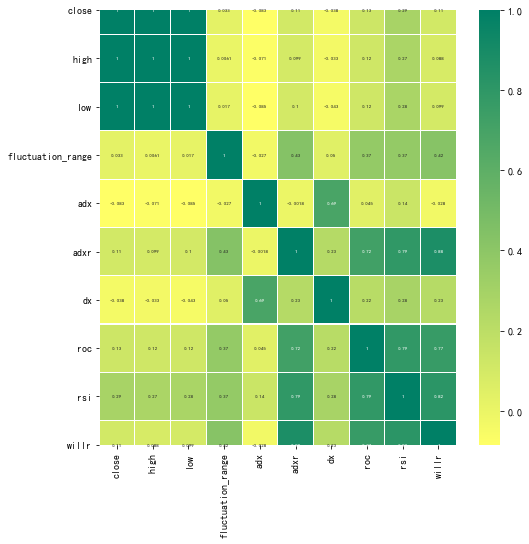

In [56]:
feature_col = ['close', 'high', 'low', 'fluctuation_range', 'adx', 'adxr',
       'dx', 'roc', 'rsi', 'willr']
feature_data = national_debt[feature_col]
print(feature_data.corr())  # 相关系数矩阵，即给出了任意两款菜式之间的相关系数
#绘制热力图
#https://bluebird.blog.csdn.net/article/details/102474190?utm_medium=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromBaidu-1.not_use_machine_learn_pai&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromBaidu-1.not_use_machine_learn_pai
plt.figure(figsize = (8, 8))  # 设置画布大小 
sns.heatmap(feature_data.corr(),linewidths = 0.01,annot=True,cmap = 'summer_r',annot_kws={'size':5,'weight':'bold'})
plt.show()

In [57]:
print(feature_data.corr()[u'close'])  
print(feature_data[u'high'].corr(national_debt[u'low']))

close                1.000000
high                 0.997999
low                  0.999321
fluctuation_range    0.033000
                       ...   
dx                  -0.037900
roc                  0.130058
rsi                  0.285489
willr                0.109393
Name: close, Length: 10, dtype: float64
0.9977690083097238


In [58]:
# final_col = ['open','close', 'fluctuation_range', 'adx', 'adxr','apo', 'atr', 'avgrprice', 'beta', 'bop', 'cmo', 'dx', 'ma',
#        'minus_di', 'mom', 'natr', 'sar', 'roc', 'rsi', 'sma', 'willr']
# national_debt = national_debt[final_col]

national_debt.to_csv("data/national_debt_5y_feature.csv",encoding='gbk',index = True)

In [47]:
national_debt = pd.read_csv('data/national_debt_5y_feature.csv',index_col = 0,encoding = 'gb2312')  # 读取股票文件
national_debt = national_debt[30:]
national_debt.head()
national_debt.describe()

,open,close,fluctuation_range,adx,adxr,apo,atr,avgrprice,beta,bop,...,dx,ma,minus_di,mom,natr,sar,roc,rsi,sma,willr
日期,,,,,,,,,,,,,,,,,,,,,
2016/4/19,2.700,2.677,-0.0056,27.069289,130.692387,0.017699,0.029853,2.68850,0.115004,-1.000000,...,55.962937,2.584067,10.506210,0.153,1.115179,2.580591,6.061807,68.311897,2.584067,-12.105263
2016/4/20,2.680,2.677,0.0000,29.133121,105.071646,0.027199,0.029150,2.68275,0.254771,-0.150000,...,55.962937,2.584733,9.990052,0.146,1.088888,2.597308,5.768471,68.311897,2.584733,-12.105263
2016/4/21,2.723,2.727,0.0187,31.531048,121.772662,0.039231,0.030710,2.72125,0.372497,0.190476,...,62.704092,2.588300,8.802465,0.166,1.126156,2.611685,6.481843,75.029144,2.588300,-0.458716
2016/4/22,2.747,2.710,-0.0062,34.002162,105.051292,0.049109,0.031160,2.72850,0.429426,-1.000000,...,66.126650,2.591667,8.054388,0.147,1.149799,2.630295,5.735466,69.625035,2.591667,-15.611814
2016/4/25,2.730,2.728,0.0066,36.296769,98.758510,0.057641,0.030362,2.72900,0.284830,-1.000000,...,66.126650,2.596433,7.674709,0.149,1.112993,2.651302,5.777433,71.930394,2.596433,-8.755760


,open,close,fluctuation_range,adx,adxr,apo,atr,avgrprice,beta,bop,...,dx,ma,minus_di,mom,natr,sar,roc,rsi,sma,willr
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,...,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,3.057214,3.037439,-0.000003,32.074359,-11.529962,-0.000566,0.043696,3.046059,0.362973,-0.385039,...,32.092537,3.038593,21.765226,-0.000762,1.484097,3.049817,0.050610,48.761029,3.038593,-57.418263
std,0.420472,0.421096,0.009565,13.860065,112.815507,0.061159,0.014933,0.420462,0.821615,0.599603,...,20.976147,0.411655,11.837480,0.111060,0.610840,0.428368,4.029624,16.269276,0.411655,32.297413
min,1.740000,1.740000,-0.058500,10.354013,-326.666667,-0.224359,0.019867,1.740000,-3.187021,-1.000000,...,0.018825,1.926667,3.184772,-0.467000,0.599911,1.740000,-17.791411,10.508311,1.926667,-100.000000
25%,2.772500,2.733500,-0.004400,21.359460,-94.305671,-0.035571,0.030938,2.755125,-0.038487,-0.889700,...,14.557622,2.740383,13.258116,-0.062000,1.015119,2.775452,-1.981764,37.133697,2.740383,-87.112289
50%,3.023000,3.005000,0.000000,29.334877,-21.809989,-0.009628,0.040672,3.011000,0.274850,-0.628571,...,29.644747,3.007067,19.964924,-0.012000,1.273596,3.018968,-0.380711,48.328581,3.007067,-64.666667
75%,3.300000,3.286500,0.004300,39.878076,81.052351,0.028663,0.053066,3.287625,0.633649,0.000000,...,47.277867,3.297517,27.437270,0.053000,1.848292,3.295905,1.751819,59.768177,3.297517,-26.981527
max,4.000000,3.968000,0.060700,72.153676,296.700508,0.201840,0.089816,3.975750,8.346357,1.000000,...,88.279780,3.919200,69.254799,0.478000,3.395080,4.000000,23.125302,91.610994,3.919200,-0.000000
